In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle

In [3]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [6]:
data['output'].value_counts(normalize=True)

output
1    0.544554
0    0.455446
Name: proportion, dtype: float64

<Axes: title={'center': 'output'}, xlabel='output'>

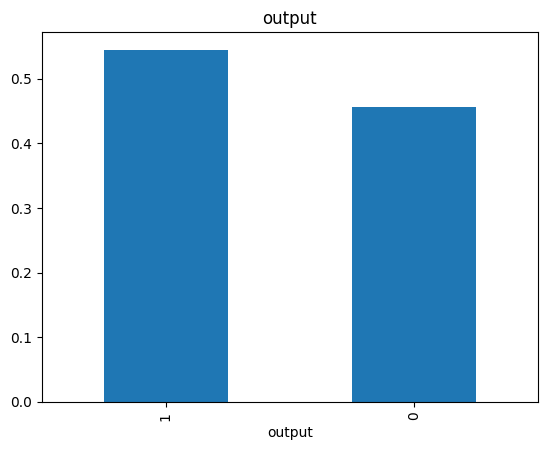

In [7]:
data['output'].value_counts(normalize=True).plot.bar(title='output')

<Axes: >

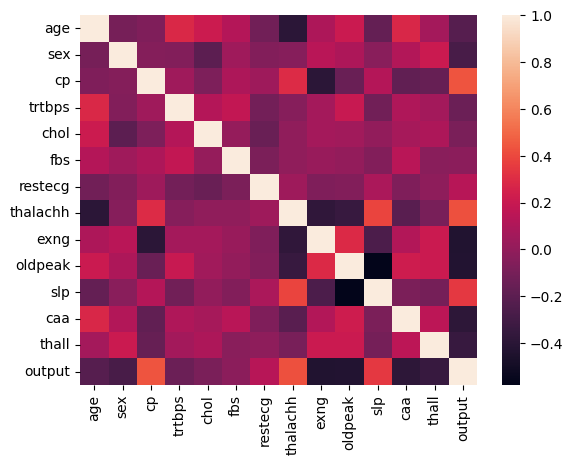

In [8]:
sns.heatmap(data.corr())

In [9]:
X = data.drop(['output'], axis=1)
y = data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Logistic Regression

In [11]:
logistic = LogisticRegression(random_state=0)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'max_iter': [100, 200, 300]
}
clf_logistic = GridSearchCV(logistic, param_grid, scoring='accuracy', cv=10)
clf_logistic.fit(scaled_X_train, y_train)
print(clf_logistic.best_params_)
pred = clf_logistic.predict(scaled_X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

{'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}


0.8360655737704918

# Neural Network

In [12]:
neural_network = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=0)
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
clf_neural_network = GridSearchCV(neural_network, param_grid, scoring='accuracy', cv=10)
clf_neural_network.fit(scaled_X_train, y_train)
print(clf_neural_network.best_params_)
pred = clf_neural_network.predict(scaled_X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

{'activation': 'logistic', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam'}


0.8524590163934426

# Support Vector Machine (SVM)

In [13]:
svm = SVC(random_state=0)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 1.0]
}
clf_svm = GridSearchCV(svm, param_grid, scoring='accuracy', cv=10)
clf_svm.fit(scaled_X_train, y_train)
print(clf_svm.best_params_)
pred = clf_svm.predict(scaled_X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

{'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}


0.819672131147541

# Decision Tree

In [14]:
dt = DecisionTreeClassifier(random_state=0)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
clf_dt = GridSearchCV(dt, param_grid, scoring='accuracy', cv=10)
clf_dt.fit(X_train, y_train)
print(clf_dt.best_params_)
pred = clf_dt.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}


0.7377049180327869

# Random Forest

In [15]:
rf = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
clf_rf = GridSearchCV(rf, param_grid, scoring='accuracy', cv=10)
clf_rf.fit(X_train, y_train)
print(clf_rf.best_params_)
pred = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


0.9016393442622951

In [16]:
pickle.dump(clf_rf, open('RF_model.pkl','wb'))